<xarray.DataArray 'p_density' (lat: 61, lon: 62)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 38.0 37.5 37.0 36.5 36.0 ... 10.0 9.5 9.0 8.5 8.0
  * lon      (lon) float64 67.44 67.94 68.44 68.94 ... 96.44 96.94 97.44 97.94
Attributes:
    long_name:       p_density
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    units:           Degree
<xarray.DataArray 'PM25' (lat: 61, lon: 62)>
[3782 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 67.44 67.94 68.44 68.94 ... 96.44 96.94 97.44 97.94
  * lat      (lat) float64 38.0 37.5 37.0 36.5 36.0 ... 10.0 9.5 9.0 8.5 8.0
Attributes:
    long_name:       PM25
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHER

C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Subhadeep Maishal\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


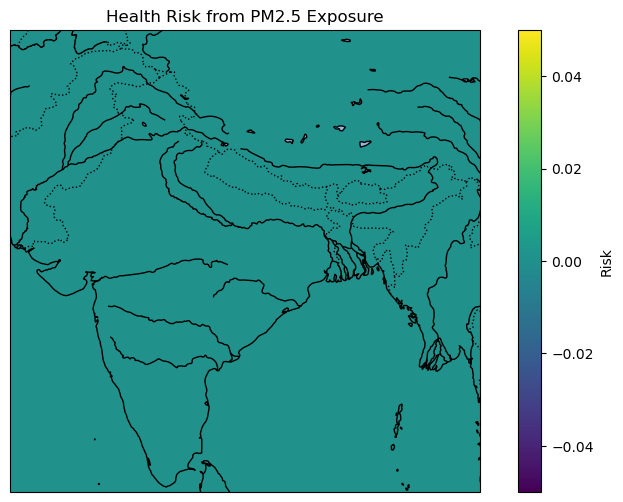

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the population density data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
population_density_ds = xr.open_dataset(population_density_file)

# Load the PM2.5 concentration data
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"
pm25_ds = xr.open_dataset(pm25_file)

# Extract relevant variables
population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25']

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Check if dimensions match now
print(population_density_interp)
print(pm25)

# Define risk parameters
beta = 0.005
pm25_threshold = 10  # µg/m³

# Calculate exposure
exposure = population_density_interp * pm25

# Calculate risk
risk = 1 - np.exp(-beta * (pm25 - pm25_threshold))
risk = risk.where(pm25 > pm25_threshold, 0)  # Apply threshold

# Add risk to the dataset for easier handling
pm25_ds['risk'] = risk

# Save the risk data to a new NetCDF file
output_file = "H:/#PM25_MODI/population_density/revised_re/risk.nc"
pm25_ds.to_netcdf(output_file)

print(f"Risk data saved to {output_file}")

# Plotting the risk data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the risk data
risk.plot(ax=ax, cmap='viridis', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Risk'})

# Add geographical features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add a title
plt.title('Health Risk from PM2.5 Exposure')

# Show the plot
plt.show()


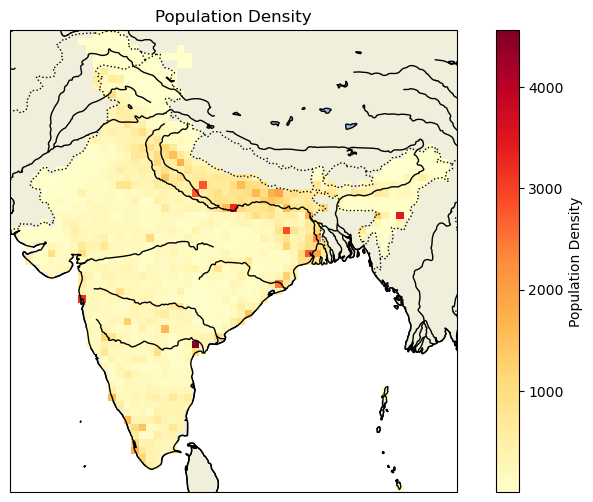

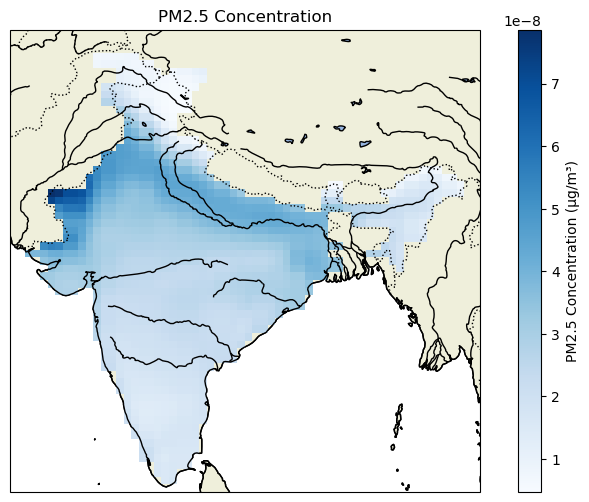

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the population density data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
population_density_ds = xr.open_dataset(population_density_file)

# Load the PM2.5 concentration data
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"
pm25_ds = xr.open_dataset(pm25_file)

# Extract relevant variables
population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25']

# Plotting population density
plt.figure(figsize=(10, 6))
ax1 = plt.axes(projection=ccrs.PlateCarree())
population_density.plot(ax=ax1, cmap='YlOrRd', transform=ccrs.PlateCarree(), 
                        cbar_kwargs={'label': 'Population Density'})
ax1.set_title('Population Density')

# Adding geographical features
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.LAND, edgecolor='black')
ax1.add_feature(cfeature.LAKES, edgecolor='black')
ax1.add_feature(cfeature.RIVERS, edgecolor='black')

plt.show()

# Plotting PM2.5 concentrations
plt.figure(figsize=(10, 6))
ax2 = plt.axes(projection=ccrs.PlateCarree())
pm25.plot(ax=ax2, cmap='Blues', transform=ccrs.PlateCarree(), 
          cbar_kwargs={'label': 'PM2.5 Concentration (µg/m³)'})
ax2.set_title('PM2.5 Concentration')

# Adding geographical features
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.LAND, edgecolor='black')
ax2.add_feature(cfeature.LAKES, edgecolor='black')
ax2.add_feature(cfeature.RIVERS, edgecolor='black')

plt.show()


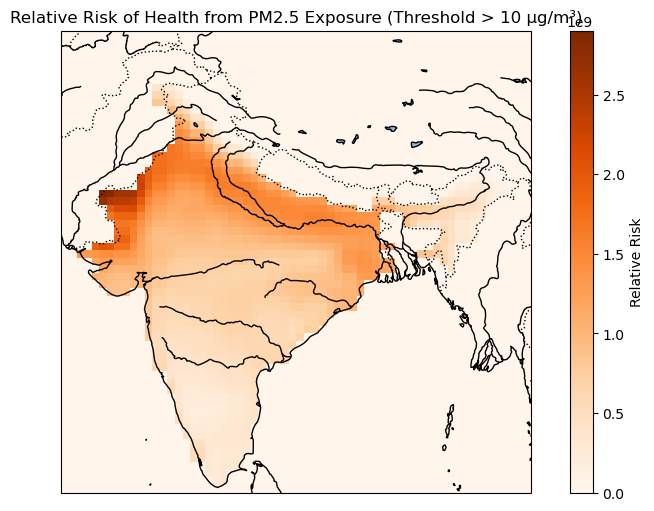

In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the population density data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
population_density_ds = xr.open_dataset(population_density_file)

# Load the PM2.5 concentration data
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"
pm25_ds = xr.open_dataset(pm25_file)

# Extract relevant variables
population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25']

# Convert PM2.5 concentration from kg/m³ to µg/m³
pm25 = pm25 * 1e9  # Convert kg/m³ to µg/m³

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Define risk parameters based on WHO guidelines
pm25_threshold = 10  # µg/m³

# Calculate risk for PM2.5 > threshold
risk_exposed = 1 - np.exp(-0.005 * (pm25 - pm25_threshold))
risk_exposed = risk_exposed.where(pm25 > pm25_threshold, 0)  # Apply threshold

# Calculate risk for PM2.5 <= threshold
risk_unexposed = 1 - np.exp(-0.005 * (pm25 - pm25_threshold))
risk_unexposed = risk_unexposed.where(pm25 <= pm25_threshold, 0)  # Apply threshold

# Calculate Relative Risk (RR)
rr = risk_exposed / (risk_unexposed + 1e-10)  # Adding a small value to avoid division by zero

# Plotting the Relative Risk (RR)
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the Relative Risk (RR)
rr.plot(ax=ax, cmap='Oranges', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Relative Risk'})

# Adding geographical features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add a title
plt.title(f'Relative Risk of Health from PM2.5 Exposure (Threshold > {pm25_threshold} µg/m³)')

# Show the plot
plt.show()


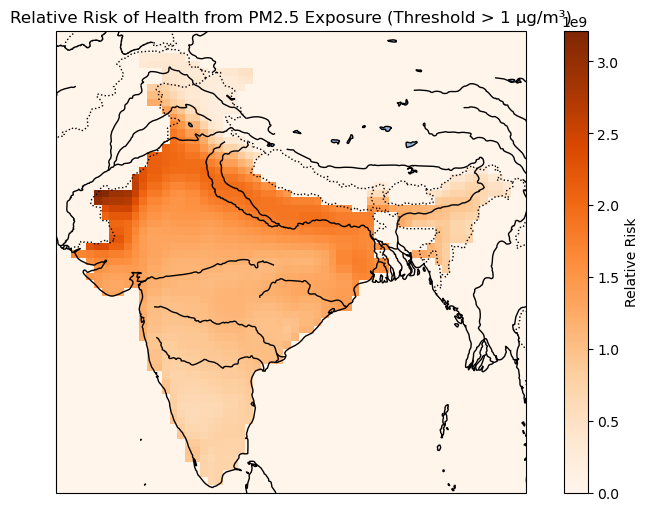

In [21]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the population density data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
population_density_ds = xr.open_dataset(population_density_file)

# Load the PM2.5 concentration data
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"
pm25_ds = xr.open_dataset(pm25_file)

# Extract relevant variables
population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25']

# Convert PM2.5 concentration from kg/m³ to µg/m³
pm25 = pm25 * 1e9  # Convert kg/m³ to µg/m³

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Define risk parameters based on WHO guidelines
pm25_threshold = 1  # µg/m³

# Calculate risk for PM2.5 > threshold
risk_exposed = 1 - np.exp(-0.005 * (pm25 - pm25_threshold))
risk_exposed = risk_exposed.where(pm25 > pm25_threshold, 0)  # Apply threshold

# Calculate risk for PM2.5 <= threshold
risk_unexposed = 1 - np.exp(-0.005 * (pm25 - pm25_threshold))
risk_unexposed = risk_unexposed.where(pm25 <= pm25_threshold, 0)  # Apply threshold

# Calculate Relative Risk (RR)
rr = risk_exposed / (risk_unexposed + 1e-10)  # Adding a small value to avoid division by zero

# Plotting the Relative Risk (RR)
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the Relative Risk (RR)
rr.plot(ax=ax, cmap='Oranges', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Relative Risk'})

# Adding geographical features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add a title
plt.title(f'Relative Risk of Health from PM2.5 Exposure (Threshold > {pm25_threshold} µg/m³)')

# Show the plot
plt.show()


Relative Risk data saved to H:/#PM25_MODI/population_density/revised_re/relative_risk_pm25.nc


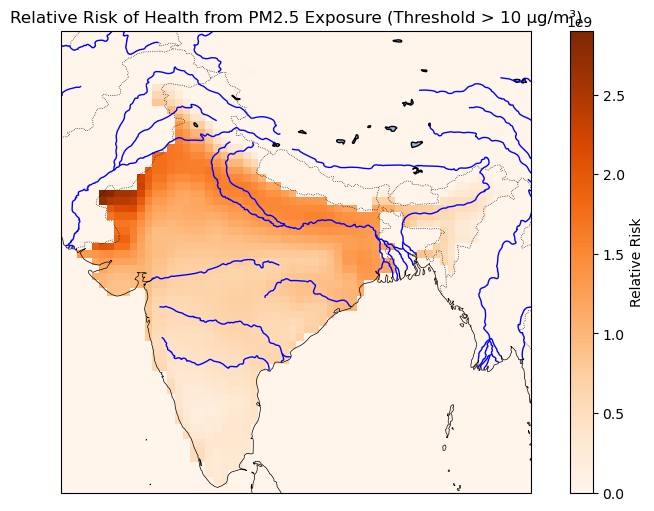

In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the population density data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
population_density_ds = xr.open_dataset(population_density_file)

# Load the PM2.5 concentration data
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"
pm25_ds = xr.open_dataset(pm25_file)

# Extract relevant variables
population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25']

# Convert PM2.5 concentration from kg/m³ to µg/m³
pm25 = pm25 * 1e9  # Convert kg/m³ to µg/m³

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Define risk parameters based on WHO guidelines
pm25_threshold = 10  # µg/m³

# Calculate risk for PM2.5 > threshold
risk_exposed = 1 - np.exp(-0.005 * (pm25 - pm25_threshold))
risk_exposed = risk_exposed.where(pm25 > pm25_threshold, 0)  # Apply threshold

# Calculate risk for PM2.5 <= threshold
risk_unexposed = 1 - np.exp(-0.005 * (pm25 - pm25_threshold))
risk_unexposed = risk_unexposed.where(pm25 <= pm25_threshold, 0)  # Apply threshold

# Calculate Relative Risk (RR)
rr = risk_exposed / (risk_unexposed + 1e-10)  # Adding a small value to avoid division by zero

# Save RR data to a NetCDF file
rr_output_file = "H:/#PM25_MODI/population_density/revised_re/relative_risk_pm25.nc"
rr.to_netcdf(rr_output_file)

print(f"Relative Risk data saved to {rr_output_file}")

# Plotting the Relative Risk (RR)
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the Relative Risk (RR)
im = rr.plot(ax=ax, cmap='Oranges', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Relative Risk'})

# Adding geographical features
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')  # Changed river color to blue for visibility

# Add a title
plt.title(f'Relative Risk of Health from PM2.5 Exposure (Threshold > {pm25_threshold} µg/m³)')

# Adjust colorbar ticks for better readability
cbar = im.colorbar
cbar.ax.tick_params(labelsize=10)

# Save the plot as an image file (optional)
plt.savefig("H:/#PM25_MODI/population_density/revised_re/relative_risk_pm25.png")

# Show the plot
plt.show()


Premature deaths data saved to H:/#PM25_MODI/population_density/revised_re/premature_deaths.nc
Morbidity cases data saved to H:/#PM25_MODI/population_density/revised_re/morbidity_cases.nc


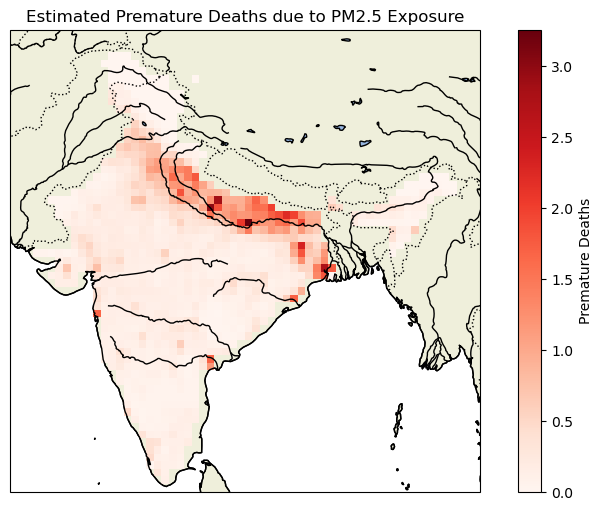

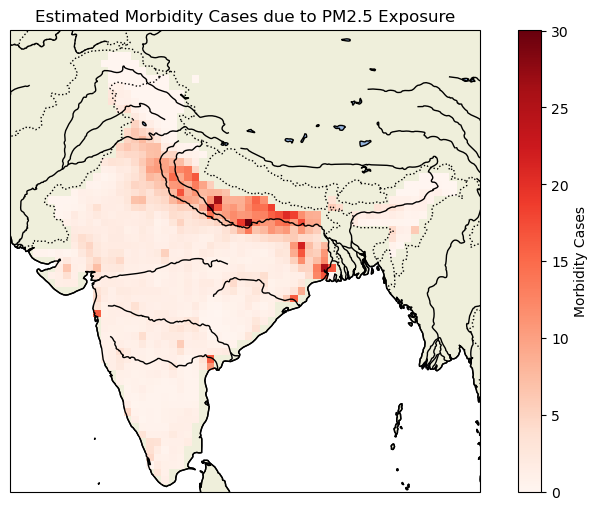

In [24]:
import xarray as xr
import numpy as np

# Load the population density and PM2.5 concentration data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"

population_density_ds = xr.open_dataset(population_density_file)
pm25_ds = xr.open_dataset(pm25_file)

population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25'] * 1e9  # Convert PM2.5 concentration from kg/m³ to µg/m³

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Define health parameters
baseline_mortality_rate = 8.5 / 1000  # Example: 8.5 deaths per 1000 people per year
baseline_morbidity_rate = 50 / 1000  # Example: 50 cases of disease per 1000 people per year
crf_mortality = 0.006  # CRF for mortality per µg/m³ of PM2.5
crf_morbidity = 0.01  # CRF for morbidity per µg/m³ of PM2.5
pm25_threshold = 10  # µg/m³

# Calculate attributable fraction (AF) for mortality
af_mortality = 1 - np.exp(-crf_mortality * (pm25 - pm25_threshold))
af_mortality = af_mortality.where(pm25 > pm25_threshold, 0)  # Apply threshold

# Calculate attributable fraction (AF) for morbidity
af_morbidity = 1 - np.exp(-crf_morbidity * (pm25 - pm25_threshold))
af_morbidity = af_morbidity.where(pm25 > pm25_threshold, 0)  # Apply threshold

# Estimate the number of premature deaths
premature_deaths = af_mortality * population_density_interp * baseline_mortality_rate

# Estimate the number of morbidity cases
morbidity_cases = af_morbidity * population_density_interp * baseline_morbidity_rate

# Save the results to NetCDF files
premature_deaths_file = "H:/#PM25_MODI/population_density/revised_re/premature_deaths.nc"
morbidity_cases_file = "H:/#PM25_MODI/population_density/revised_re/morbidity_cases.nc"

premature_deaths.to_netcdf(premature_deaths_file)
morbidity_cases.to_netcdf(morbidity_cases_file)

print(f"Premature deaths data saved to {premature_deaths_file}")
print(f"Morbidity cases data saved to {morbidity_cases_file}")

# Plot the results
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_data(data, title, cbar_label, vmin=None, vmax=None, cmap='Reds'):
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    data.plot(ax=ax, cmap=cmap, transform=ccrs.PlateCarree(), cbar_kwargs={'label': cbar_label}, vmin=vmin, vmax=vmax)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS, edgecolor='black')
    plt.title(title)
    plt.show()

# Plot premature deaths
plot_data(premature_deaths, 'Estimated Premature Deaths due to PM2.5 Exposure', 'Premature Deaths')

# Plot morbidity cases
plot_data(morbidity_cases, 'Estimated Morbidity Cases due to PM2.5 Exposure', 'Morbidity Cases')


In [25]:
import xarray as xr
import numpy as np

# Load the population density and PM2.5 concentration data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"

population_density_ds = xr.open_dataset(population_density_file)
pm25_ds = xr.open_dataset(pm25_file)

population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25'] * 1e9  # Convert PM2.5 concentration from kg/m³ to µg/m³

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Define risk parameters and threshold
beta = 0.005
pm25_threshold = 10  # µg/m³

# Calculate risk for PM2.5 > threshold
risk_exposed = 1 - np.exp(-beta * (pm25 - pm25_threshold))
risk_exposed = risk_exposed.where(pm25 > pm25_threshold, 0)

# Healthcare cost per morbidity case (in USD)
healthcare_cost_per_case = 5000  # Example value

# Value of statistical life (in USD)
value_of_statistical_life = 5000000  # Example value

# Lost productivity cost per morbidity case (in USD)
lost_productivity_cost_per_case = 2000  # Example value

# Baseline mortality and morbidity rates (per person per year)
baseline_mortality_rate = 0.0001  # Example value
baseline_morbidity_rate = 0.01  # Example value

# Estimate the number of health impacts due to PM2.5 exposure
mortality_cases = risk_exposed * population_density_interp * baseline_mortality_rate
morbidity_cases = risk_exposed * population_density_interp * baseline_morbidity_rate

# Estimate the economic costs
economic_cost_mortality = mortality_cases * value_of_statistical_life
economic_cost_morbidity_healthcare = morbidity_cases * healthcare_cost_per_case
economic_cost_morbidity_productivity = morbidity_cases * lost_productivity_cost_per_case

total_economic_cost = (economic_cost_mortality + economic_cost_morbidity_healthcare + economic_cost_morbidity_productivity).sum()

print(f"Total Economic Cost due to PM2.5 Exposure: ${total_economic_cost.values:.2f} USD")


Total Economic Cost due to PM2.5 Exposure: $16864415.50 USD


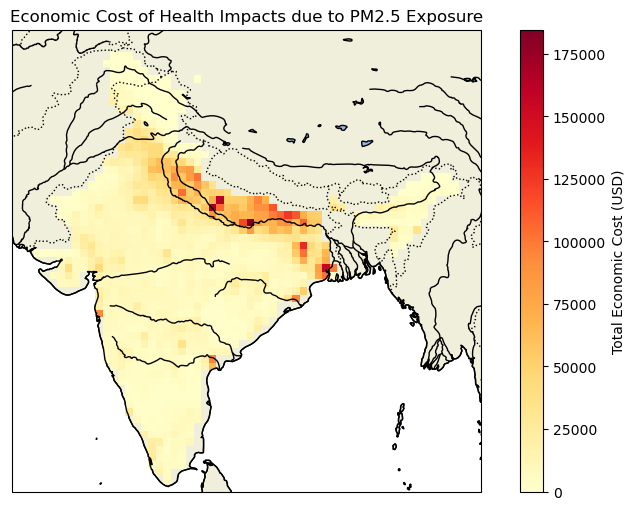

Economic cost data saved to H:/#PM25_MODI/population_density/revised_re/economic_cost.nc


In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the population density and PM2.5 concentration data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"

population_density_ds = xr.open_dataset(population_density_file)
pm25_ds = xr.open_dataset(pm25_file)

population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25'] * 1e9  # Convert PM2.5 concentration from kg/m³ to µg/m³

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Define risk parameters and threshold
beta = 0.005
pm25_threshold = 10  # µg/m³

# Calculate risk for PM2.5 > threshold
risk_exposed = 1 - np.exp(-beta * (pm25 - pm25_threshold))
risk_exposed = risk_exposed.where(pm25 > pm25_threshold, 0)

# Healthcare cost per morbidity case (in USD)
healthcare_cost_per_case = 5000  # Example value

# Value of statistical life (in USD)
value_of_statistical_life = 5000000  # Example value

# Lost productivity cost per morbidity case (in USD)
lost_productivity_cost_per_case = 2000  # Example value

# Baseline mortality and morbidity rates (per person per year)
baseline_mortality_rate = 0.0001  # Example value
baseline_morbidity_rate = 0.01  # Example value

# Estimate the number of health impacts due to PM2.5 exposure
mortality_cases = risk_exposed * population_density_interp * baseline_mortality_rate
morbidity_cases = risk_exposed * population_density_interp * baseline_morbidity_rate

# Estimate the economic costs
economic_cost_mortality = mortality_cases * value_of_statistical_life
economic_cost_morbidity_healthcare = morbidity_cases * healthcare_cost_per_case
economic_cost_morbidity_productivity = morbidity_cases * lost_productivity_cost_per_case

total_economic_cost = (economic_cost_mortality + economic_cost_morbidity_healthcare + economic_cost_morbidity_productivity)

# Plotting the economic cost data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the total economic cost
total_economic_cost.plot(ax=ax, cmap='YlOrRd', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Total Economic Cost (USD)'})

# Adding geographical features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add a title
plt.title('Economic Cost of Health Impacts due to PM2.5 Exposure')

# Show the plot
plt.show()

# Save the total economic cost data to a new NetCDF file
output_file = "H:/#PM25_MODI/population_density/revised_re/economic_cost.nc"
total_economic_cost.to_netcdf(output_file)

print(f"Economic cost data saved to {output_file}")


Respiratory disease cases data saved to H:/#PM25_MODI/population_density/revised_re/respiratory_disease_cases.nc


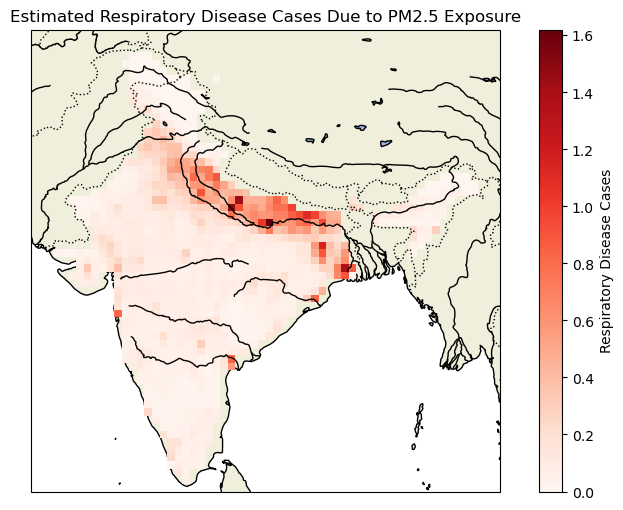

In [27]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the population density and PM2.5 concentration data
population_density_file = "H:/#PM25_MODI/population_density/revised_re/population_density.nc"
pm25_file = "H:/#PM25_MODI/population_density/revised_re/pm25.nc"

population_density_ds = xr.open_dataset(population_density_file)
pm25_ds = xr.open_dataset(pm25_file)

population_density = population_density_ds['p_density']
pm25 = pm25_ds['PM25'] * 1e9  # Convert PM2.5 concentration from kg/m³ to µg/m³

# Interpolate population density to match PM2.5 grid
population_density_interp = population_density.interp(lat=pm25['lat'], lon=pm25['lon'], method='linear')

# Define risk parameters and threshold
beta = 0.005
pm25_threshold = 10  # µg/m³

# Calculate risk for PM2.5 > threshold
risk_exposed = 1 - np.exp(-beta * (pm25 - pm25_threshold))
risk_exposed = risk_exposed.where(pm25 > pm25_threshold, 0)

# Baseline morbidity rate for respiratory diseases (per person per year)
baseline_resp_morbidity_rate = 0.005  # Example value

# Estimate the number of respiratory disease cases due to PM2.5 exposure
respiratory_disease_cases = risk_exposed * population_density_interp * baseline_resp_morbidity_rate

# Save the respiratory disease cases data to a new NetCDF file
output_file_resp = "H:/#PM25_MODI/population_density/revised_re/respiratory_disease_cases.nc"
respiratory_disease_cases.to_netcdf(output_file_resp)
print(f"Respiratory disease cases data saved to {output_file_resp}")

# Plotting the respiratory disease cases data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the respiratory disease cases
respiratory_disease_cases.plot(ax=ax, cmap='Reds', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Respiratory Disease Cases'})

# Adding geographical features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add a title
plt.title('Estimated Respiratory Disease Cases Due to PM2.5 Exposure')

# Show the plot
plt.show()
